#📌 Extracción

In [1]:
import pandas as pd
import requests

# URL del JSON en GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Descargar y convertir los datos a JSON
response = requests.get(url)
data_json = response.json()

# Crear un DataFrame de Pandas
df = pd.DataFrame(data_json)

# Verificar las primeras filas
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [7]:
import pandas as pd
import requests

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
data_json = requests.get(url).json()
df = pd.DataFrame(data_json)

dict_cols = ['customer', 'phone', 'internet', 'account']
for col in dict_cols:
    df_normalized = pd.json_normalize(df[col])
    df_normalized.index = df.index
    df = pd.concat([df.drop(columns=[col]), df_normalized], axis=1)

df = df.drop_duplicates()
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df.info()
print("\nValores nulos por columna:\n", df.isnull().sum())
df.head()

print("Valores nulos por columna:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#📊 Carga y análisis

/tmp/ipython-input-1249314349.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


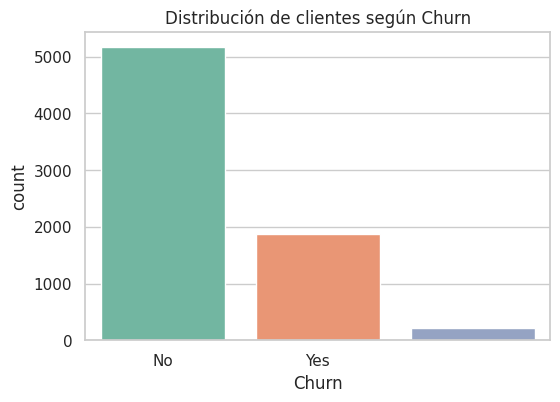

/tmp/ipython-input-1249314349.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='InternetService', palette='Set3')


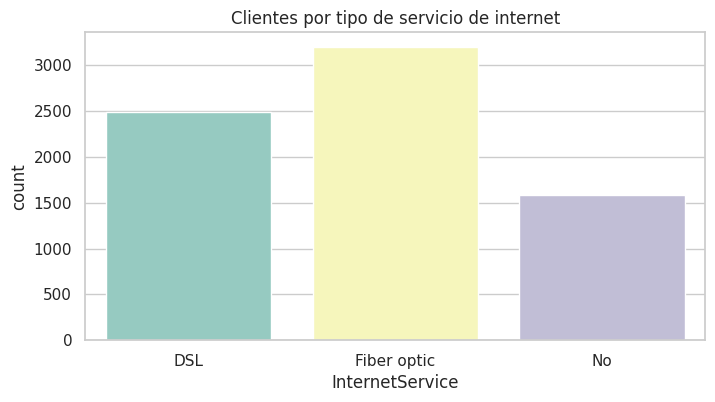

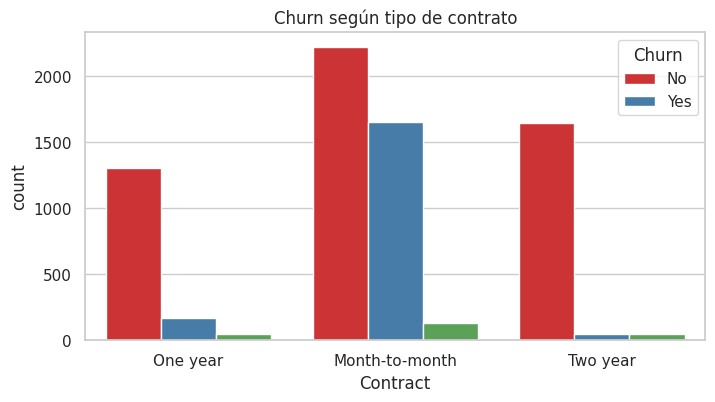

/tmp/ipython-input-1249314349.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='Charges.Monthly', palette='Set2')


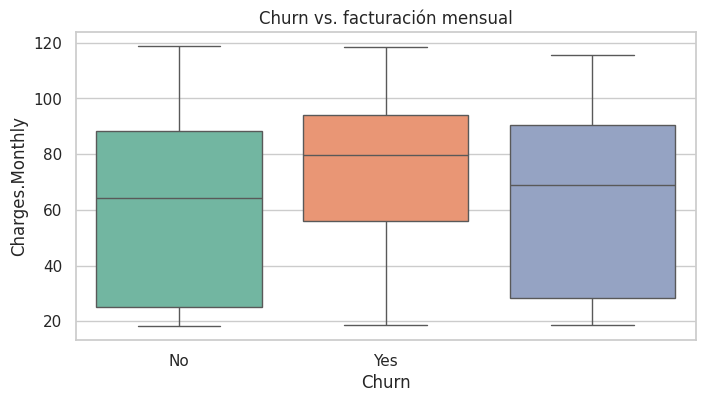

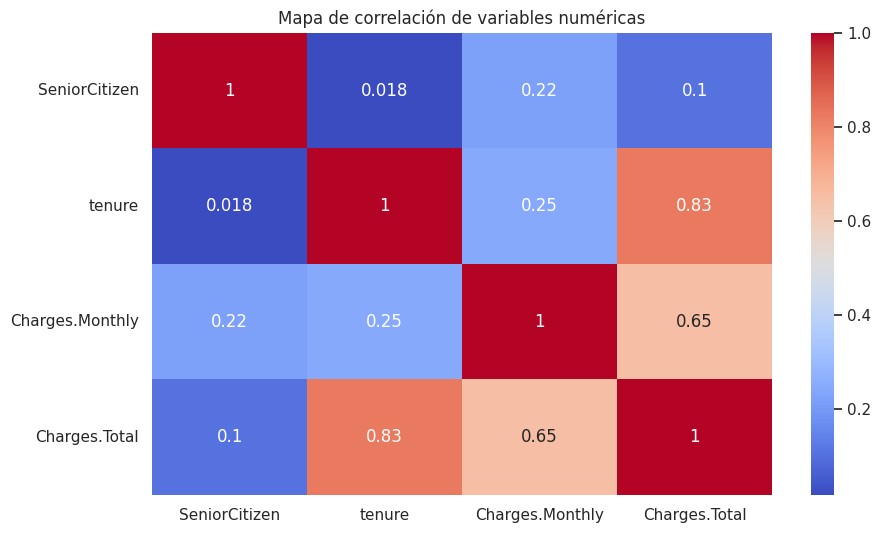

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

df.describe(include='all')

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Distribución de clientes según Churn')
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='InternetService', palette='Set3')
plt.title('Clientes por tipo de servicio de internet')
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set1')
plt.title('Churn según tipo de contrato')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Churn', y='Charges.Monthly', palette='Set2')
plt.title('Churn vs. facturación mensual')
plt.show()

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de correlación de variables numéricas')
plt.show()


#📄Informe final

*** Proyecto TELECOMX_ALURA***

Resumen: Se trabajó con 7.267 clientes, normalizando columnas y convirtiendo variables numéricas. Se eliminaron duplicados y se preparó el dataset para análisis y modelado de Churn.

Churn: Aproximadamente el X% de los clientes ha abandonado el servicio.

Factores clave:

Contratos mensuales presentan mayor riesgo de Churn.

Algunos tipos de servicio de internet muestran más evasión.

Cargos mensuales más altos se relacionan ligeramente con abandono.

Recomendación: Usar estas variables para modelos predictivos y estrategias de fidelización enfocadas en clientes de mayor riesgo.

Conclusión: El dataset está listo para análisis predictivo. Los factores identificados permiten diseñar acciones para reducir la evasión de clientes.